# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

columnNames = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns = columnNames)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)




# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        cities_df = cities_df.append({"City": city,"Country": country,},ignore_index=True)
        

# Print the city count to confirm sufficient count
print(len(cities))


url = "http://api.openweathermap.org/data/2.5/weather?"

596


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
print("Ring.. Ring.. Starting Calls")
row_count = 0
set_count = 1
for index, row in cities_df.iterrows():
    target_city = row['City']
    target_url = url + 'appid='+ api_key+'&units=IMPERIAL'+'&q='+target_city
    city_data = requests.get(target_url).json()
    row_count+=1
    
    
    if row_count % 51 == 0:
        set_count += 1
        row_count = 0
        
        
    
    if city_data["cod"] == "404":
        print('City not found. Skipping...')
        
             
    else:
        
        print("Processing Record: "+ str(row_count) + " |<Set " +str(set_count) +">| " + city_data['name'].title()+ ", "+ city_data['sys']['country'])
        cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        
        
        
        
        
        ## I didnt want to make it seem like suspicious traffic
        time.sleep(np.random.randint(1.5, 2))

Ring.. Ring.. Starting Calls
Processing Record: 1 |<Set 1>| Roald, NO


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Austin\Anaconda3

Processing Record: 2 |<Set 1>| Hermanus, ZA
Processing Record: 3 |<Set 1>| Clyde River, CA
Processing Record: 4 |<Set 1>| Bluff, AU
Processing Record: 5 |<Set 1>| Tuktoyaktuk, CA
Processing Record: 6 |<Set 1>| Dunedin, NZ
Processing Record: 7 |<Set 1>| Hami, CN
Processing Record: 8 |<Set 1>| Isla Vista, US
City not found. Skipping...
Processing Record: 10 |<Set 1>| Baruun-Urt, MN
Processing Record: 11 |<Set 1>| Natal, BR
Processing Record: 12 |<Set 1>| Mataura, NZ
City not found. Skipping...
Processing Record: 14 |<Set 1>| Solnechnyy, RU
Processing Record: 15 |<Set 1>| Castro, CL
Processing Record: 16 |<Set 1>| Pimenta Bueno, BR
Processing Record: 17 |<Set 1>| Geraldton, CA
Processing Record: 18 |<Set 1>| Purpe, RU
Processing Record: 19 |<Set 1>| Yerbogachen, RU
Processing Record: 20 |<Set 1>| Rikitea, PF
Processing Record: 21 |<Set 1>| Binzhou, CN
Processing Record: 22 |<Set 1>| Lensk, RU
Processing Record: 23 |<Set 1>| Dingle, PH
Processing Record: 24 |<Set 1>| Hithadhoo, MV
Processi

Processing Record: 40 |<Set 4>| Nanakuli, US
Processing Record: 41 |<Set 4>| Hohhot, CN
Processing Record: 42 |<Set 4>| Kolno, PL
Processing Record: 43 |<Set 4>| Lodja, CD
Processing Record: 44 |<Set 4>| Verkhnyaya Inta, RU
Processing Record: 45 |<Set 4>| Ekhabi, RU
Processing Record: 46 |<Set 4>| Montepuez, MZ
Processing Record: 47 |<Set 4>| Lorengau, PG
Processing Record: 48 |<Set 4>| Isverna, RO
Processing Record: 49 |<Set 4>| Rosarito, CO
Processing Record: 50 |<Set 4>| Aripuana, BR
Processing Record: 0 |<Set 5>| Teahupoo, PF
Processing Record: 1 |<Set 5>| Yulara, AU
Processing Record: 2 |<Set 5>| Constitucion, MX
Processing Record: 3 |<Set 5>| Goderich, CA
Processing Record: 4 |<Set 5>| Saskylakh, RU
Processing Record: 5 |<Set 5>| Ulaangom, MN
City not found. Skipping...
City not found. Skipping...
Processing Record: 8 |<Set 5>| Kamloops, CA
Processing Record: 9 |<Set 5>| Narsaq, GL
Processing Record: 10 |<Set 5>| Ust-Ilimsk, RU
Processing Record: 11 |<Set 5>| George, NG
Processin

Processing Record: 25 |<Set 8>| Tamandare, BR
Processing Record: 26 |<Set 8>| Piacabucu, BR
Processing Record: 27 |<Set 8>| Mutoko, ZW
Processing Record: 28 |<Set 8>| Manuk Mangkaw, PH
Processing Record: 29 |<Set 8>| Muros, ES
Processing Record: 30 |<Set 8>| San Ignacio, CL
City not found. Skipping...
Processing Record: 32 |<Set 8>| Bunia, CD
Processing Record: 33 |<Set 8>| Faya, SA
Processing Record: 34 |<Set 8>| Fort Nelson, CA
Processing Record: 35 |<Set 8>| Jilin, CN
Processing Record: 36 |<Set 8>| Ishigaki, JP
Processing Record: 37 |<Set 8>| Katangli, RU
City not found. Skipping...
Processing Record: 39 |<Set 8>| Hamilton, BM
Processing Record: 40 |<Set 8>| Yurty, RU
Processing Record: 41 |<Set 8>| Chicama, PE
Processing Record: 42 |<Set 8>| Katsuura, JP
Processing Record: 43 |<Set 8>| Suixi, CN
Processing Record: 44 |<Set 8>| Ixtapa, MX
City not found. Skipping...
Processing Record: 46 |<Set 8>| Aviles, ES
Processing Record: 47 |<Set 8>| Chara, GR
Processing Record: 48 |<Set 8>| 

City not found. Skipping...
Processing Record: 10 |<Set 12>| San Rafael, AR
Processing Record: 11 |<Set 12>| Shu, KZ
Processing Record: 12 |<Set 12>| Miri, NG
Processing Record: 13 |<Set 12>| Broken Hill, AU
City not found. Skipping...
Processing Record: 15 |<Set 12>| Ust-Nera, RU
Processing Record: 16 |<Set 12>| Maryville, US
Processing Record: 17 |<Set 12>| Oyem, GA
Processing Record: 18 |<Set 12>| Petropavlovsk-Kamchatskiy, RU
Processing Record: 19 |<Set 12>| Sochi, RU
Processing Record: 20 |<Set 12>| Yaan, NG
Processing Record: 21 |<Set 12>| Astana, KZ
Processing Record: 22 |<Set 12>| Palmer, AU
Processing Record: 23 |<Set 12>| Huarmey, PE
Processing Record: 24 |<Set 12>| Moose Factory, CA
Processing Record: 25 |<Set 12>| Maraa, BR
Processing Record: 26 |<Set 12>| Rawson, AR
City not found. Skipping...
Processing Record: 28 |<Set 12>| Bratsk, RU
Processing Record: 29 |<Set 12>| Meiringen, CH
Processing Record: 30 |<Set 12>| Dhadar, IN
Processing Record: 31 |<Set 12>| Waipawa, NZ
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
cities_df.dropna(inplace=True)
cities_df.count()

City                535
Country             535
Temperature (F)     535
Latitude            535
Longitude           535
Humidity (%)        535
Cloudiness (%)      535
Wind Speed (mph)    535
dtype: int64

In [17]:
cities_df.to_csv(r'..\dataframe.csv')
cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,roald,no,30.99,62.58,6.12,59,0,18.34
1,hermanus,za,61.88,-34.42,19.24,93,0,2.48
2,clyde river,ca,10.4,70.47,-68.59,85,68,2.48
3,bluff,nz,78.6,-23.58,149.07,55,0,6.29
4,tuktoyaktuk,ca,8.6,69.44,-133.03,84,75,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

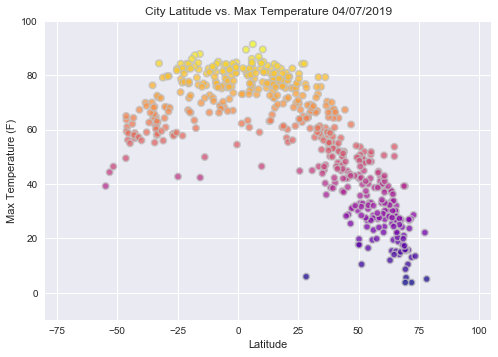

In [23]:
plt.scatter(cities_df["Latitude"],
           cities_df["Temperature (F)"], c=cities_df["Temperature (F)"],
           edgecolor="silver", linewidths = 1.5, marker="8",
           cmap='plasma', alpha=0.75, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 105])
plt.ylim([-10, 100])
plt.savefig("../Images/Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

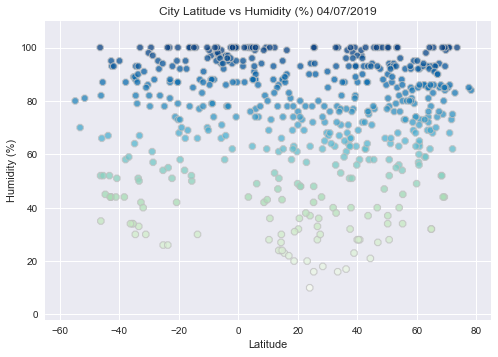

In [19]:
plt.scatter(cities_df["Latitude"],
           cities_df["Humidity (%)"], c=cities_df["Humidity (%)"],
           edgecolor="silver", linewidths = 1.15, marker="8",
           cmap='GnBu', alpha=0.75, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-65, 85])
plt.ylim([-2, 110])
plt.savefig("../Images/Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

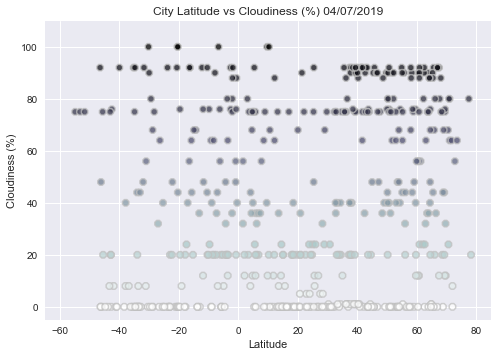

In [20]:
plt.scatter(cities_df["Latitude"],
           cities_df["Cloudiness (%)"], c=cities_df["Cloudiness (%)"],
           edgecolor="silver", linewidths = 1.5, marker="8",
           cmap='bone_r', alpha=0.75, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-65, 85])
plt.ylim([-5, 110])
plt.savefig("../Images/Lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

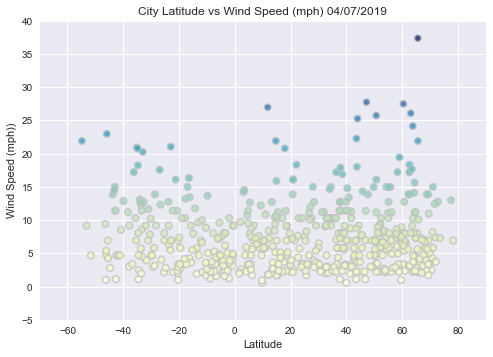

In [21]:
plt.scatter(cities_df["Latitude"],
           cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"],
           edgecolor="silver", linewidths = 1.5, marker="8",
           cmap='YlGnBu', alpha=0.75, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-5, 40])
plt.savefig("../Images/Lat_windspd.png")
plt.show()